## Creating experiment groups

In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import lab
from lab.classes import database, ExperimentSet, ExperimentGroup, Experiment
import lab.analysis.behavior_analysis as ba

### loading HR experiment groups

In [296]:
def getBehaviorData(expts, dataKey, **kwargs):
    result=dict();
    result[dataKey]=[];
    result["expt"]=[];
    
    for expt in expts:
        if(dataKey=="velocity"):
            bd={dataKey: ba.velocity(expt.find("trial"), **kwargs)}
        elif(dataKey=="absolutePosition"):
            bd={dataKey: ba.absolutePosition(expt.find("trial"), **kwargs)}
        else:
            bd=expt[0].behaviorData(**kwargs);
        result[dataKey].append(bd[dataKey]);
        result["expt"].append(expt);
        
    return pd.DataFrame(result);

In [6]:
expSet = ExperimentSet("mossy.sql")

In [202]:
gtm_4 = expSet.grabMouse('gtm4_1')
expList = gtm_4.findall('experiment')
expGrp2 = lab.ExperimentGroup(expList)
expGrp2.removeDatalessExperiments()
expGrp2.removeMissingBehaviorData()
len(expGrp2)

38

In [297]:
veloDF = getBehaviorData(expGrp2, 'licking')
veloDF.head()

,expt,licking
0,[[]],"[[21.7519998177886, 21.852000199258327], [21.9..."
1,[[]],"[[0.03399999812245369, 0.10000000521540642], [..."
2,[[]],"[[0.0990000031888485, 0.19099999591708183], [0..."
3,[[]],"[[1.7099999897181988, 1.793000053614378], [1.9..."
4,[[]],"[[0.1510000042617321, 0.22699999436736107], [0..."


AttributeError: Unknown property kind

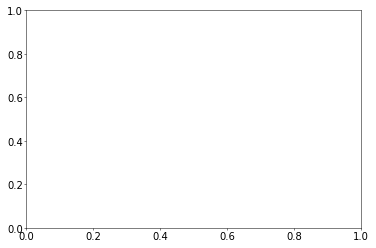

In [300]:
veloSeries1 = veloDF['licking'][0]
plt.plot(veloSeries1, kind='dot')

In [259]:
ExperimentGroup.velocity_dataframe(expGrp2)

,trial,value
0,[],3.453881
1,[],4.343631
2,[],3.549827
3,[],3.921931
4,[],6.044391
5,[],4.809050
6,[],6.138987
7,[],6.169791
8,[],4.464867
9,[],4.383431


In [251]:
(expGrp2[1])

['trial_id',
 'session',
 'lap_tolerance',
 'experimentType',
 'laps',
 'stopTime',
 'uniqueLocationKey',
 'belt',
 'tSeriesDirectory',
 'track_length',
 'lap_reset_tag',
 'position_scale',
 'startTime',
 'trial_length',
 'sensors',
 'day',
 'condition',
 'contexts',
 'uses',
 'controllers',
 'sync_pin',
 'imagingLayer',
 'experimenter',
 'reward',
 'trial_attrs']

In [265]:
trial = expGrp2[0][0]
# expt.behaviorData(imageSync=True)
# behav
trial.velocity(imageSync=True)

AttributeError: 'Trial' object has no attribute 'velocity'

In [276]:
Experiment.velocity(expGrp2[0])

[array([ 0.        , -0.66192311, -0.70386416, ...,  0.        ,
         0.        ,  0.        ])]

In [277]:
ba.velocity(trial)

array([ 0.        , -0.66192311, -0.70386416, ...,  0.        ,
        0.        ,  0.        ])

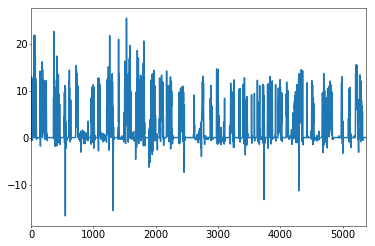

In [274]:
velo = ba.velocity(trial)
veloSeries = pd.Series(velo)
veloSeries.plot()

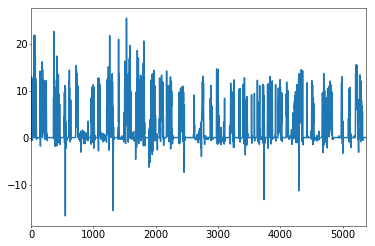

In [279]:
velo = Experiment.velocity(expGrp2[0])
veloSeries = pd.Series(velo[0])
veloSeries.plot()

In [209]:
imagingData = Experiment.imagingData(expGrp2[1])

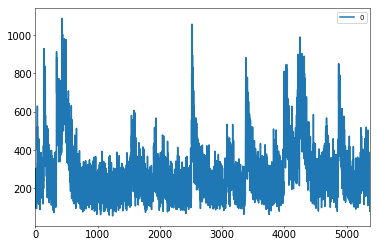

In [221]:
cell1 = pd.DataFrame(imagingData[0])
cell1.plot()

In [190]:
exp = expSet.grabExpt('gtm4_1', '2018-10-22-11h21m31s')
Experiment.running(exp)
# exp.running()

AttributeError: 'Trial' object has no attribute 'running'

In [142]:
help(expt)

Help on Experiment in module lab.classes.experiment object:

class Experiment(xml.etree.ElementTree.Element)
 |  An object representing a single recording session.
 |  
 |  Experiment instances comprise an ExperimentSet and are instantiated upon
 |  initialization of an ExperimentSet.  They are not directly initialized.
 |  
 |  Example
 |  -------
 |  
 |  >>> from lab import ExperimentSet
 |  >>> expt_set = ExperimentSet(
 |      '/analysis/experimentSummaries/.clean_code/experiments/behavior.xml')
 |  >>> experiment = expt_set.grabExpt('mouseID', 'startTime')
 |  
 |  Note
 |  ----
 |  The Experiment class inherits from the ElementTree.Element class, and as
 |  such, it retains the hierarchical organization of the .xml file.
 |  Experiment.parent returns the mouse object associated with that experiment,
 |  and Experiment.findall('trial') returns the list of trials associated with
 |  the Experiment.
 |  
 |  Method resolution order:
 |      Experiment
 |      xml.etree.ElementTree.

In [133]:
help(expGrp)

Help on ExperimentGroup in module lab.classes.classes object:

class ExperimentGroup(__builtin__.object)
 |  Grouping of experiments, e.g. by same location and experiment type.
 |  
 |  Example
 |  -------
 |  >>> from lab import ExperimentSet
 |  >>> expt_set = ExperimentSet(
 |      '/analysis/experimentSummaries/.clean_code/experiments/behavior_jeff.xml')
 |  
 |  >>> e1 = expt_set.grabExpt('sample_mouse', 'startTime1')
 |  >>> e2 = expt_set.grabExpt('sample_mouse', 'startTime2')
 |  
 |  >>> expt_grp = ExperimentGroup([e1, e2], label='example_group')
 |  
 |  Parameters
 |  ----------
 |  experiment_list : list
 |      A list of lab.classes.Experiment objects comprising the group.
 |  
 |  label : string
 |      A string describing the contents of the group.  For example, if you are
 |      comparing two ExperimentGroups (e.g. WT vs. mutant), you could label
 |      them as such.
 |  
 |  Methods defined here:
 |  
 |  __copy__(self)
 |  
 |  __deepcopy__(self)
 |  
 |  __delitem__

In [140]:
len(expGrp)

2

In [136]:
expGrp = expGrp.removeMissingBehaviorData()

In [126]:
lick = getBehaviorData(expGrp, 'running')

AttributeError: 'Mouse' object has no attribute 'behaviorData'